In [2]:
import pandas as pd
import numpy as np

# GroupBy Mechanics
Hadley Wickham - GroupBy is -> **"split-apply-combine"**  
In the first stage of the process, data contained in a pandas object, whether a Series, Data‐Frame, or otherwise, is split into groups based on one or more keys that you provide. The splitting is performed on a particular axis of an object. For example, a DataFrame can be grouped on its rows (axis=0) or its columns (axis=1). Once this is done, a function is applied to each group, producing a new value. Finally, the results of all those function applications are combined into a result object. The form of the resulting object will usually depend on what’s being done to the data.
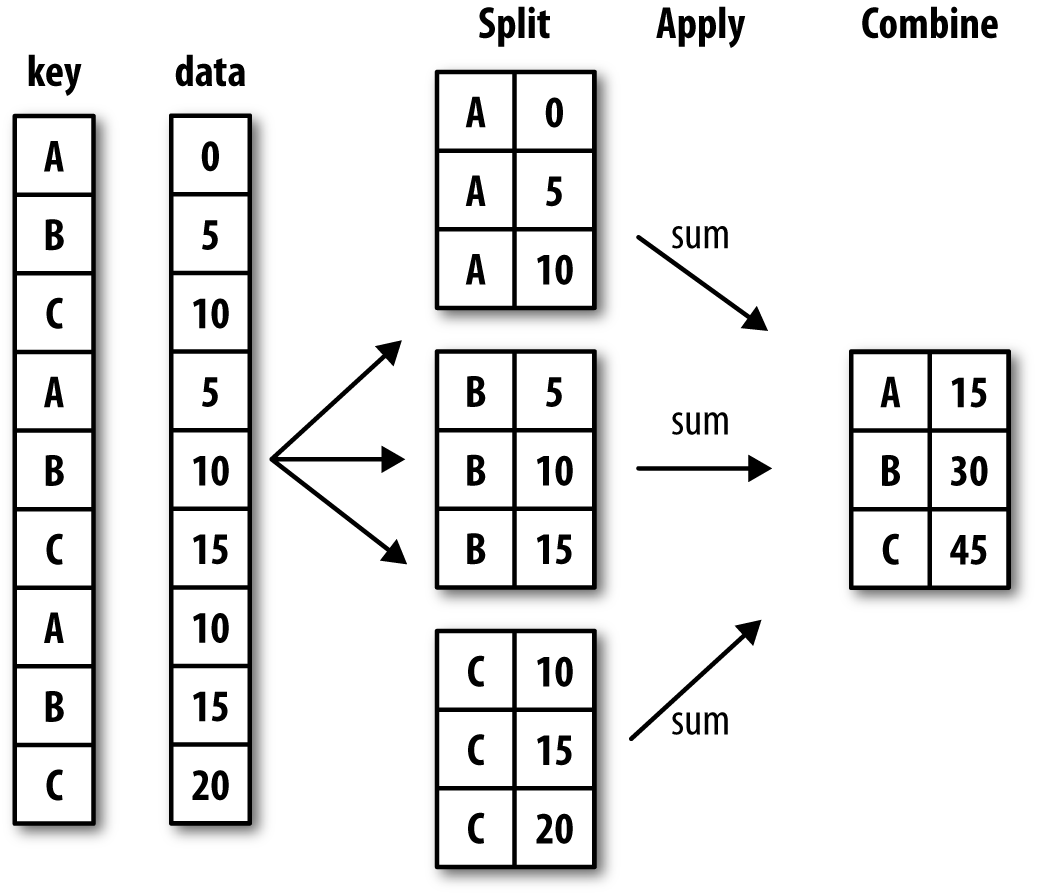

In [2]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'], 
                   'key2' : ['one', 'two', 'one', 'two', 'one'], 
                   'data1' : np.arange(5), 
                   'data2' : np.arange(5)})
df

key1 key2  data1  data2
0    a  one      0      0
1    a  two      1      1
2    b  one      2      2
3    b  two      3      3
4    a  one      4      4

Suppose you wanted to compute the mean of the data1 column using the labels from key1. There are a number of ways to do this. One is to access data1 and call groupby with the column (a Series) at key1:

In [3]:
grouped = df['data1'].groupby(df['key1'])
grouped

This grouped variable is now a GroupBy object. It has not actually computed anything yet except for some intermediate data about the group key df['key1']. The idea is that this object has all of the information needed to then apply some operation to each of the groups. For example, to compute group means we can call the GroupBy’s mean method:

In [4]:
grouped.mean()

key1
a    1.666667
b    2.500000
Name: data1, dtype: float64

Note how the data (a Series) has been aggregated according to the group key, producing a new Series that is now indexed by the unique values in the key1 column. The result index has the name 'key1' because the DataFrame column df['key1'] did.

In [5]:
df

key1 key2  data1  data2
0    a  one      0      0
1    a  two      1      1
2    b  one      2      2
3    b  two      3      3
4    a  one      4      4

If instead we had passed multiple arrays as a list, we’d get something different:

In [6]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one     2
      two     1
b     one     2
      two     3
Name: data1, dtype: int32

In [7]:
means1 = df['data1'].groupby([df['key2'], df['key1']]).mean()
means1

key2  key1
one   a       2
      b       2
two   a       1
      b       3
Name: data1, dtype: int32

In [8]:
means.unstack()

key2  one  two
key1          
a       2    1
b       2    3

In this example, the group keys are all Series, though they could be any arrays of the right length:

In [9]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states, years]).mean()

California  2005    1.0
            2006    2.0
Ohio        2005    1.5
            2006    4.0
Name: data1, dtype: float64

Frequently the grouping information is found in the same DataFrame as the data you want to work on. In that case, you can pass column names (whether those are strings, numbers, or other Python objects) as the group keys:

In [10]:
df

key1 key2  data1  data2
0    a  one      0      0
1    a  two      1      1
2    b  one      2      2
3    b  two      3      3
4    a  one      4      4

In [11]:
df.groupby('key1').mean() # pandas is smart to ignore key2

data1     data2
key1                    
a     1.666667  1.666667
b     2.500000  2.500000

You may have noticed in the first case df.groupby('key1').mean() that there is no key2 column in the result. Because df['key2'] is not numeric data, it is said to be a nuisance column, which is therefore excluded from the result. By default, all of the numeric columns are aggregated,

In [12]:
df.groupby(['key1', 'key2']).mean()

data1  data2
key1 key2              
a    one       2      2
     two       1      1
b    one       2      2
     two       3      3

Regardless of the objective in using groupby, a generally useful GroupBy method is size, which returns a Series containing group sizes:  
Take note that any missing values in a group key will be excluded from the result.

In [13]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

## Iterating Over Groups

The GroupBy object supports iteration, generating a sequence of 2-tuples containing the group name along with the chunk of data. Consider the following:

In [14]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
  key1 key2  data1  data2
0    a  one      0      0
1    a  two      1      1
4    a  one      4      4
b
  key1 key2  data1  data2
2    b  one      2      2
3    b  two      3      3


In the case of multiple keys, the first element in the tuple will be a tuple of key values:

In [15]:
for (k1,k2), group in df.groupby(['key1','key2']):
    print((k1,k2))
    print(group)

('a', 'one')
  key1 key2  data1  data2
0    a  one      0      0
4    a  one      4      4
('a', 'two')
  key1 key2  data1  data2
1    a  two      1      1
('b', 'one')
  key1 key2  data1  data2
2    b  one      2      2
('b', 'two')
  key1 key2  data1  data2
3    b  two      3      3


Of course, you can choose to do whatever you want with the pieces of data. A recipe you may find useful is computing a dict of the data pieces as a one-liner:

In [16]:
pieces = dict(list(df.groupby('key1')))
pieces['b']

key1 key2  data1  data2
2    b  one      2      2
3    b  two      3      3

Breakdown -

In [17]:
df.groupby('key1')

In [18]:
list(df.groupby('key1'))

[('a',
    key1 key2  data1  data2
  0    a  one      0      0
  1    a  two      1      1
  4    a  one      4      4),
 ('b',
    key1 key2  data1  data2
  2    b  one      2      2
  3    b  two      3      3)]

In [19]:
dict(list(df.groupby('key1')))

{'a':   key1 key2  data1  data2
 0    a  one      0      0
 1    a  two      1      1
 4    a  one      4      4,
 'b':   key1 key2  data1  data2
 2    b  one      2      2
 3    b  two      3      3}

In [20]:
dict(list(df.groupby('key1')))['b']

key1 key2  data1  data2
2    b  one      2      2
3    b  two      3      3

By default groupby groups on axis=0, but you can group on any of the other axes. For example, we could group the columns of our example df here by dtype like so:

In [21]:
df.dtypes

key1     object
key2     object
data1     int32
data2     int32
dtype: object

In [22]:
grouped = df.groupby(df.dtypes,axis=1)
grouped

In [23]:
for dtype, group in grouped:
    print(dtype)
    print(group)

int32
   data1  data2
0      0      0
1      1      1
2      2      2
3      3      3
4      4      4
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


## Selecting a Column or Subset of Columns

The object returned by this indexing operation is a grouped DataFrame if a list or array is passed or a grouped Series if only a single column name is passed as a scalar:

In [24]:
df.groupby('key1')['data1'] 
# syntactic sugar -> df['data1'].groupby('key1')

In [25]:
df.groupby('key1')[['data1']] 
# syntactic sugar -> df[['data1']].groupby('key1')

Especially for large datasets, it may be desirable to aggregate only a few columns. For example, in the preceding dataset, to compute means for just the data2 column and get the result as a DataFrame, we could write:

In [26]:
df.groupby(['key1', 'key2'])[['data2']].mean()  # Result is DataFrame

data2
key1 key2       
a    one       2
     two       1
b    one       2
     two       3

In [3]:
df.groupby(['key1', 'key2'])['data2'].mean()  # Result is Series

key1  key2
a     one     2
      two     1
b     one     2
      two     3
Name: data2, dtype: int32

## Grouping with Dicts and Series

In [27]:
people = pd.DataFrame(np.random.randn(5, 5), 
                      columns=['a', 'b', 'c', 'd', 'e'], 
                      index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people

a         b         c         d         e
Joe    -0.424131  0.397862  1.865370 -0.049772 -1.258894
Steve   1.505681  2.019950  0.268095 -0.486290 -2.323083
Wes    -0.904027 -1.335749 -1.468908 -0.230374 -1.259137
Jim    -0.353320  1.653664  2.239065 -0.366656  0.415273
Travis -0.464760 -0.389159  1.355165 -0.050475 -1.876810

In [28]:
people.iloc[2:3, [1, 2]] = np.nan # Add a few NA values
people

a         b         c         d         e
Joe    -0.424131  0.397862  1.865370 -0.049772 -1.258894
Steve   1.505681  2.019950  0.268095 -0.486290 -2.323083
Wes    -0.904027       NaN       NaN -0.230374 -1.259137
Jim    -0.353320  1.653664  2.239065 -0.366656  0.415273
Travis -0.464760 -0.389159  1.355165 -0.050475 -1.876810

In [29]:
mapping = {'a': 'red' , 'b': 'red', 'c' : 'blue',
           'd': 'blue', 'e': 'red', 'f' : 'orange'}

Now, you could construct an array from this dict to pass to groupby, but instead we can just pass the dict (I included the key 'f' to highlight that unused grouping keys are OK):

In [30]:
by_column = people.groupby(mapping, axis=1)
by_column.mean()

blue       red
Joe     0.907799 -0.428388
Steve  -0.109097  0.400849
Wes    -0.230374 -1.081582
Jim     0.936205  0.571872
Travis  0.652345 -0.910243

In [31]:
by_column.sum()

blue       red
Joe     1.815598 -1.285163
Steve  -0.218195  1.202548
Wes    -0.230374 -2.163164
Jim     1.872409  1.715616
Travis  1.304690 -2.730728

In [32]:
map_series = pd.Series(mapping)
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [33]:
people.groupby(map_series, axis=1).count()

blue  red
Joe        2    3
Steve      2    3
Wes        1    2
Jim        2    3
Travis     2    3

## Grouping with Functions

Using Python functions is a more generic way of defining a group mapping compared with a dict or Series. Any function passed as a group key will be called once per index alue, with the return values being used as the group names.  
More concretely, consider the example DataFrame from the previous section, which has people’s first names as index values. Suppose you wanted to group by the length of the names; while you could compute an array of string lengths, it’s simpler to just pass the len function:

In [34]:
people

a         b         c         d         e
Joe    -0.424131  0.397862  1.865370 -0.049772 -1.258894
Steve   1.505681  2.019950  0.268095 -0.486290 -2.323083
Wes    -0.904027       NaN       NaN -0.230374 -1.259137
Jim    -0.353320  1.653664  2.239065 -0.366656  0.415273
Travis -0.464760 -0.389159  1.355165 -0.050475 -1.876810

In [35]:
people.groupby(len).sum()

a         b         c         d         e
3 -1.681478  2.051526  4.104436 -0.646802 -2.102759
5  1.505681  2.019950  0.268095 -0.486290 -2.323083
6 -0.464760 -0.389159  1.355165 -0.050475 -1.876810

Mixing functions with arrays, dicts, or Series is not a problem as everything gets converted to arrays internally:

In [36]:
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).min()

a         b         c         d         e
3 one -0.904027  0.397862  1.865370 -0.230374 -1.259137
  two -0.353320  1.653664  2.239065 -0.366656  0.415273
5 one  1.505681  2.019950  0.268095 -0.486290 -2.323083
6 two -0.464760 -0.389159  1.355165 -0.050475 -1.876810

## Grouping by Index Levels

A final convenience for hierarchically indexed datasets is the ability to aggregate using one of the levels of an axis index. Let’s look at an example:

In [37]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'], 
                                     [1, 3, 5, 1, 3]], 
                                    names=['cty', 'tenor'])
hier_df = pd.DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0      1.008244  0.645163  0.550206  0.370655  1.075346
1     -0.160707 -0.889491 -1.379391  0.021418  0.860496
2     -0.749869  0.047330  2.556376  0.576482 -1.388457
3      1.394473 -2.462523 -1.212204  1.712646  0.856439

To group by level, pass the level number or name using the level keyword:

In [38]:
hier_df.groupby(level='cty', axis=1).count()

cty  JP  US
0     2   3
1     2   3
2     2   3
3     2   3

# Data Aggregation

Aggregations refer to any data transformation that produces scalar values from arrays. The preceding examples have used several of them, including mean, count, min, and sum. Many common aggregations, such as those found in Table below, have optimized implementations. However, you are not limited to only this set of methods.
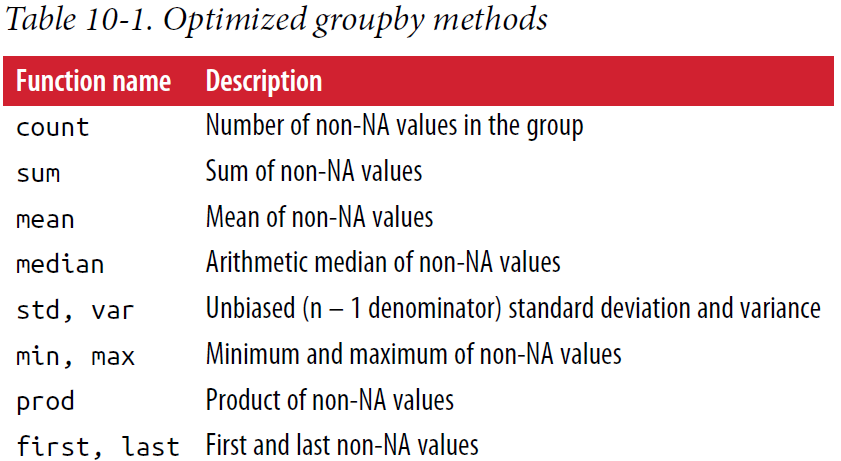

quantile computes sample quantiles of a Series or a DataFrame’s columns. While quantile is not explicitly implemented for GroupBy, it is a Series method and thus available for use. Internally, GroupBy efficiently slices up the Series, calls

In [4]:
df

key1 key2  data1  data2
0    a  one      0      0
1    a  two      1      1
2    b  one      2      2
3    b  two      3      3
4    a  one      4      4

In [8]:
grouped = df.groupby('key1')
grouped['data1'].quantile(0.9)

key1
a    3.4
b    2.9
Name: data1, dtype: float64

To use your own aggregation functions, pass any function that aggregates an array to the `aggregate` or `agg` method:

In [41]:
def peak_to_peak(arr):
    return arr.max() - arr.min()
grouped.agg(peak_to_peak)

data1  data2
key1              
a         4      4
b         1      1

You may notice that some methods like `describe` also work, even though they are not aggregations, strictly speaking:

In [42]:
grouped.describe()

data1                                                data2            \
     count      mean       std  min   25%  50%   75%  max count      mean   
key1                                                                        
a      3.0  1.666667  2.081666  0.0  0.50  1.0  2.50  4.0   3.0  1.666667   
b      2.0  2.500000  0.707107  2.0  2.25  2.5  2.75  3.0   2.0  2.500000   

                                           
           std  min   25%  50%   75%  max  
key1                                       
a     2.081666  0.0  0.50  1.0  2.50  4.0  
b     0.707107  2.0  2.25  2.5  2.75  3.0

## Column-Wise and Multiple Function Application

In [14]:
tips = pd.read_csv('tips.csv')
tips.head()

total_bill   tip smoker  day    time  size
0       16.99  1.01     No  Sun  Dinner     2
1       10.34  1.66     No  Sun  Dinner     3
2       21.01  3.50     No  Sun  Dinner     3
3       23.68  3.31     No  Sun  Dinner     2
4       24.59  3.61     No  Sun  Dinner     4

In [17]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips.head()

total_bill   tip smoker  day    time  size   tip_pct
0       16.99  1.01     No  Sun  Dinner     2  0.059447
1       10.34  1.66     No  Sun  Dinner     3  0.160542
2       21.01  3.50     No  Sun  Dinner     3  0.166587
3       23.68  3.31     No  Sun  Dinner     2  0.139780
4       24.59  3.61     No  Sun  Dinner     4  0.146808

In [13]:
grouped = tips.groupby(['day', 'smoker'])
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

If you pass a list of functions or function names instead, you get back a DataFrame with column names taken from the functions:

In [46]:
grouped_pct.agg(['mean', 'std', peak_to_peak])

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.151650  0.028123      0.067349
     Yes     0.174783  0.051293      0.159925
Sat  No      0.158048  0.039767      0.235193
     Yes     0.147906  0.061375      0.290095
Sun  No      0.160113  0.042347      0.193226
     Yes     0.187250  0.154134      0.644685
Thur No      0.160298  0.038774      0.193350
     Yes     0.163863  0.039389      0.151240

You don’t need to accept the names that GroupBy gives to the columns; notably, lambda functions have the name '\<lambda>', which makes them hard to identify (you can see for yourself by looking at a function’s \_\_name__ attribute). Thus, if you pass a list of (name, function) tuples, the first element of each tuple will be used as the DataFrame column names (you can think of a list of 2-tuples as an ordered mapping):

In [47]:
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])

foo       bar
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

With a DataFrame you have more options, as you can specify a list of functions to apply to all of the columns or different functions per column. To start, suppose we wanted to compute the same three statistics for the tip_pct and total_bill columns:

In [14]:
functions = ['count', 'mean', 'max']
result = grouped[['tip_pct', 'total_bill']].agg(functions)
result

tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

As you can see, the resulting DataFrame has hierarchical columns, the same as you would get aggregating each column separately and using concat to glue the results together using the column names as the keys argument:

In [49]:
result['tip_pct']

count      mean       max
day  smoker                           
Fri  No          4  0.151650  0.187735
     Yes        15  0.174783  0.263480
Sat  No         45  0.158048  0.291990
     Yes        42  0.147906  0.325733
Sun  No         57  0.160113  0.252672
     Yes        19  0.187250  0.710345
Thur No         45  0.160298  0.266312
     Yes        17  0.163863  0.241255

As before, a list of tuples with custom names can be passed:

In [50]:
ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]
grouped[['tip_pct', 'total_bill']].agg(ftuples)

tip_pct              total_bill            
            Durchschnitt Abweichung Durchschnitt  Abweichung
day  smoker                                                 
Fri  No         0.151650   0.000791    18.420000   25.596333
     Yes        0.174783   0.002631    16.813333   82.562438
Sat  No         0.158048   0.001581    19.661778   79.908965
     Yes        0.147906   0.003767    21.276667  101.387535
Sun  No         0.160113   0.001793    20.506667   66.099980
     Yes        0.187250   0.023757    24.120000  109.046044
Thur No         0.160298   0.001503    17.113111   59.625081
     Yes        0.163863   0.001551    19.190588   69.808518

Now, suppose you wanted to apply potentially different functions to one or more of the columns. To do this, pass a dict to agg that contains a mapping of column names to any of the function specifications listed so far:

In [51]:
grouped.agg({'tip' : np.max, 'size' : 'sum'})

tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

A DataFrame will have hierarchical columns only if multiple functions are applied to at least one column.

In [52]:
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'], 'size' : 'sum'})

tip_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Fri  No      0.120385  0.187735  0.151650  0.028123    9
     Yes     0.103555  0.263480  0.174783  0.051293   31
Sat  No      0.056797  0.291990  0.158048  0.039767  115
     Yes     0.035638  0.325733  0.147906  0.061375  104
Sun  No      0.059447  0.252672  0.160113  0.042347  167
     Yes     0.065660  0.710345  0.187250  0.154134   49
Thur No      0.072961  0.266312  0.160298  0.038774  112
     Yes     0.090014  0.241255  0.163863  0.039389   40

## Returning Aggregated Data Without Row Indexes

In all of the examples up until now, the aggregated data comes back with an index, potentially hierarchical, composed from the unique group key combinations. Since this isn’t always desirable, you can disable this behavior in most cases by passing as_index=False to groupby:

In [53]:
result = tips.groupby(['day', 'smoker'], as_index=False).mean()
result

day smoker  total_bill       tip      size   tip_pct
0   Fri     No   18.420000  2.812500  2.250000  0.151650
1   Fri    Yes   16.813333  2.714000  2.066667  0.174783
2   Sat     No   19.661778  3.102889  2.555556  0.158048
3   Sat    Yes   21.276667  2.875476  2.476190  0.147906
4   Sun     No   20.506667  3.167895  2.929825  0.160113
5   Sun    Yes   24.120000  3.516842  2.578947  0.187250
6  Thur     No   17.113111  2.673778  2.488889  0.160298
7  Thur    Yes   19.190588  3.030000  2.352941  0.163863

Of course, it’s always possible to obtain the result in this format by calling reset_index on the result also. Using the as_index=False method avoids some unnecessary computations.

In [54]:
result.reset_index()

index   day smoker  total_bill       tip      size   tip_pct
0      0   Fri     No   18.420000  2.812500  2.250000  0.151650
1      1   Fri    Yes   16.813333  2.714000  2.066667  0.174783
2      2   Sat     No   19.661778  3.102889  2.555556  0.158048
3      3   Sat    Yes   21.276667  2.875476  2.476190  0.147906
4      4   Sun     No   20.506667  3.167895  2.929825  0.160113
5      5   Sun    Yes   24.120000  3.516842  2.578947  0.187250
6      6  Thur     No   17.113111  2.673778  2.488889  0.160298
7      7  Thur    Yes   19.190588  3.030000  2.352941  0.163863

# Apply: General split-apply-combine

Suppose you wanted to select the top five tip_pct values by group. First, write a function that selects the rows with the largest values in a particular column:

In [15]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]
top(tips)

total_bill   tip smoker  day    time  size   tip_pct
183       23.17  6.50    Yes  Sun  Dinner     4  0.280535
232       11.61  3.39     No  Sat  Dinner     2  0.291990
67         3.07  1.00    Yes  Sat  Dinner     1  0.325733
178        9.60  4.00    Yes  Sun  Dinner     2  0.416667
172        7.25  5.15    Yes  Sun  Dinner     2  0.710345

Now, if we group by smoker, say, and call apply with this function, we get the following:  
The top function is called on each row group from the DataFrame, and then the results are glued together using pandas.concat, labeling the pieces with the group names. The result therefore has a hierarchical index whose inner level contains index values from the original DataFrame.

In [56]:
tips.groupby('smoker').apply(top)

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

If you pass a function to apply that takes other arguments or keywords, you can pass these after the function:

In [57]:
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  0.142857
       Sat  212       48.33   9.00     No   Sat  Dinner     4  0.186220
       Sun  156       48.17   5.00     No   Sun  Dinner     6  0.103799
       Thur 142       41.19   5.00     No  Thur   Lunch     5  0.121389
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4  0.117750
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  0.115982

Inside GroupBy, when you invoke a method like describe, it is actually just a shortcut for:
```f = lambda x: x.describe()
grouped.apply(f)```

In [31]:
result = tips.groupby('smoker')['tip_pct'].describe()
#result.columns.name='describe'
result

count      mean       std       min       25%       50%       75%  \
smoker                                                                      
No      151.0  0.159328  0.039910  0.056797  0.136906  0.155625  0.185014   
Yes      93.0  0.163196  0.085119  0.035638  0.106771  0.153846  0.195059   

             max  
smoker            
No      0.291990  
Yes     0.710345

In [42]:
result.unstack('smoker')

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

In [43]:
result.unstack('smoker').swaplevel(0,1).sort_index(0)

smoker       
No      25%        0.136906
        50%        0.155625
        75%        0.185014
        count    151.000000
        max        0.291990
        mean       0.159328
        min        0.056797
        std        0.039910
Yes     25%        0.106771
        50%        0.153846
        75%        0.195059
        count     93.000000
        max        0.710345
        mean       0.163196
        min        0.035638
        std        0.085119
dtype: float64

## Suppressing the Group Keys

In the preceding examples, you see that the resulting object has a hierarchical index formed from the group keys along with the indexes of each piece of the original object. You can disable this by passing group_keys=False to groupby:

In [45]:
tips.groupby('smoker', group_keys=False).apply(top)

total_bill   tip smoker   day    time  size   tip_pct
88        24.71  5.85     No  Thur   Lunch     2  0.236746
185       20.69  5.00     No   Sun  Dinner     5  0.241663
51        10.29  2.60     No   Sun  Dinner     2  0.252672
149        7.51  2.00     No  Thur   Lunch     2  0.266312
232       11.61  3.39     No   Sat  Dinner     2  0.291990
109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

## Quantile and Bucket Analysis

pandas has some tools, in particular cut and qcut, for slicing data up into buckets with bins of your choosing or by sample quantiles. Combining these functions with groupby makes it convenient to perform bucket or quantile analysis on a dataset. Consider a simple random dataset and an equal-length bucket categorization using cut:

In [72]:
frame = pd.DataFrame({'data1': np.random.randn(1000),
                      'data2': np.random.randn(1000)})
frame.head()

data1     data2
0 -1.341605  0.552635
1 -0.698468 -0.599744
2  1.444601 -0.948025
3  0.649026 -1.411531
4  1.176003  0.096908

In [73]:
quartiles = pd.cut(frame.data1, 4)
quartiles[:10]

0    (-1.454, 0.402]
1    (-1.454, 0.402]
2     (0.402, 2.258]
3     (0.402, 2.258]
4     (0.402, 2.258]
5    (-1.454, 0.402]
6     (0.402, 2.258]
7    (-1.454, 0.402]
8     (0.402, 2.258]
9     (0.402, 2.258]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-3.317, -1.454] < (-1.454, 0.402] < (0.402, 2.258] < (2.258, 4.114]]

The Categorical object returned by cut can be passed directly to groupby. So we could compute a set of statistics for the data2 column like so:

In [74]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
grouped = frame.data2.groupby(quartiles)
grouped.apply(get_stats)

data1                  
(-3.317, -1.454]  min       -2.576207
                  max        2.297527
                  count     76.000000
                  mean      -0.004697
(-1.454, 0.402]   min       -3.029708
                  max        3.013522
                  count    581.000000
                  mean       0.050893
(0.402, 2.258]    min       -2.803466
                  max        4.297080
                  count    332.000000
                  mean      -0.028579
(2.258, 4.114]    min       -1.844467
                  max        1.522796
                  count     11.000000
                  mean      -0.557481
Name: data2, dtype: float64

In [75]:
grouped.apply(get_stats).unstack()

min       max  count      mean
data1                                                
(-3.317, -1.454] -2.576207  2.297527   76.0 -0.004697
(-1.454, 0.402]  -3.029708  3.013522  581.0  0.050893
(0.402, 2.258]   -2.803466  4.297080  332.0 -0.028579
(2.258, 4.114]   -1.844467  1.522796   11.0 -0.557481

These were equal-length buckets; to compute equal-size buckets based on sample quantiles, use qcut. I’ll pass labels=False to just get quantile numbers:

In [82]:
grouping = pd.qcut(frame.data1, 10, labels=False)
grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

min       max  count      mean
data1                                     
0     -2.576207  2.297527  100.0 -0.015075
1     -3.029708  2.534540  100.0  0.007731
2     -2.199876  2.410210  100.0  0.030695
3     -2.300742  2.166652  100.0  0.125609
4     -2.323303  2.277975  100.0  0.105236
5     -2.714948  2.338022  100.0 -0.019630
6     -1.820799  3.013522  100.0  0.099242
7     -2.702187  4.297080  100.0  0.033974
8     -2.803466  2.272726  100.0 -0.069318
9     -2.665145  2.418866  100.0 -0.162551

In [83]:
grouping1 = pd.qcut(frame.data1, 10)
grouped = frame.data2.groupby(grouping1)
grouped.apply(get_stats).unstack()

min       max  count      mean
data1                                                 
(-3.311, -1.331]  -2.576207  2.297527  100.0 -0.015075
(-1.331, -0.821]  -3.029708  2.534540  100.0  0.007731
(-0.821, -0.505]  -2.199876  2.410210  100.0  0.030695
(-0.505, -0.258]  -2.300742  2.166652  100.0  0.125609
(-0.258, -0.0198] -2.323303  2.277975  100.0  0.105236
(-0.0198, 0.217]  -2.714948  2.338022  100.0 -0.019630
(0.217, 0.5]      -1.820799  3.013522  100.0  0.099242
(0.5, 0.8]        -2.702187  4.297080  100.0  0.033974
(0.8, 1.258]      -2.803466  2.272726  100.0 -0.069318
(1.258, 4.114]    -2.665145  2.418866  100.0 -0.162551

## Example: Filling Missing Values with Group-Specific Values

When cleaning up missing data, in some cases you will replace data observations using dropna, but in others you may want to impute (fill in) the null (NA) values using a fixed value or some value derived from the data. fillna is the right tool to use; for example, here I fill in NA values with the mean:

In [84]:
s = pd.Series(np.random.randn(6))
s[::2] = np.nan
s

0         NaN
1    0.573465
2         NaN
3   -1.170674
4         NaN
5   -0.413826
dtype: float64

In [85]:
s.fillna(s.mean())

0   -0.337011
1    0.573465
2   -0.337011
3   -1.170674
4   -0.337011
5   -0.413826
dtype: float64

Suppose you need the fill value to vary by group. One way to do this is to group the data and use apply with a function that calls fillna on each data chunk. Here is some sample data on US states divided into eastern and western regions:

In [87]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4
data = pd.Series(np.random.randn(8), index=states)
data

Ohio         -0.340192
New York     -0.500742
Vermont       0.512801
Florida       2.361721
Oregon       -1.354199
Nevada        0.184068
California   -0.496472
Idaho        -1.068184
dtype: float64

In [89]:
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data

Ohio         -0.340192
New York     -0.500742
Vermont            NaN
Florida       2.361721
Oregon       -1.354199
Nevada             NaN
California   -0.496472
Idaho              NaN
dtype: float64

In [91]:
data.groupby(group_key).mean()

East    0.506929
West   -0.925336
dtype: float64

We can fill the NA values using the group means like so:

In [92]:
fill_mean = lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)

Ohio         -0.340192
New York     -0.500742
Vermont       0.506929
Florida       2.361721
Oregon       -1.354199
Nevada       -0.925336
California   -0.496472
Idaho        -0.925336
dtype: float64

In another case, you might have predefined fill values in your code that vary by group. Since the groups have a name attribute set internally, we can use that:

In [93]:
fill_values = {'East': 0.5, 'West': -1}
fill_func = lambda g: g.fillna(fill_values[g.name])
data.groupby(group_key).apply(fill_func)

Ohio         -0.340192
New York     -0.500742
Vermont       0.500000
Florida       2.361721
Oregon       -1.354199
Nevada       -1.000000
California   -0.496472
Idaho        -1.000000
dtype: float64

## Example: Random Sampling and Permutation

Suppose you wanted to draw a random sample (with or without replacement) from a large dataset for Monte Carlo simulation purposes or some other application. There are a number of ways to perform the “draws”; here we use the sample method for Series.  
To demonstrate, here’s a way to construct a deck of English-style playing cards:

In [99]:
suits = ['H', 'S', 'C', 'D']
card_val = list(range(1, 14)) * 4
base_names = ['A'] + list(range(2, 11)) + ['J', 'K', 'Q']
cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)
    
deck = pd.Series(card_val, index=cards)
deck

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     11
KH     12
QH     13
AS      1
2S      2
3S      3
4S      4
5S      5
6S      6
7S      7
8S      8
9S      9
10S    10
JS     11
KS     12
QS     13
AC      1
2C      2
3C      3
4C      4
5C      5
6C      6
7C      7
8C      8
9C      9
10C    10
JC     11
KC     12
QC     13
AD      1
2D      2
3D      3
4D      4
5D      5
6D      6
7D      7
8D      8
9D      9
10D    10
JD     11
KD     12
QD     13
dtype: int64

Now, drawing a hand of five cards from the deck could be written as:

In [100]:
def draw(deck, n=5):
    return deck.sample(n)
draw(deck)

10C    10
8C      8
6C      6
6H      6
JS     11
dtype: int64

Suppose you wanted two random cards from each suit. Because the suit is the last character of each card name, we can group based on this and use apply:

In [107]:
get_suit = lambda card: card[-1]
deck.groupby(get_suit).apply(draw, n=2)

C  4C     4
   QC    13
D  6D     6
   KD    12
H  9H     9
   QH    13
S  7S     7
   4S     4
dtype: int64

Alternatively, we could write:

In [108]:
deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

7C      7
4C      4
KD     12
9D      9
10H    10
9H      9
3S      3
4S      4
dtype: int64

## Example: Group Weighted Average and Correlation

Under the split-apply-combine paradigm of groupby, operations between columns in a DataFrame or two Series, such as a group weighted average, are possible. As an example, take this dataset containing group keys, values, and some weights:

In [21]:
df = pd.DataFrame({'category': ['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'],
                   'data': np.random.randn(8),
                   'weights': np.random.rand(8)})
df

category      data   weights
0        a  0.213220  0.455829
1        a -0.158842  0.715170
2        a -0.980731  0.679402
3        a -0.935552  0.055283
4        b -0.167769  0.303853
5        b  1.077866  0.601935
6        b  1.143449  0.097206
7        b -1.334281  0.793929

In [22]:
grouped = df.groupby('category')
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])
grouped.apply(get_wavg)

category
a   -0.385393
b   -0.194970
dtype: float64

As another example, consider a financial dataset originally obtained from Yahoo! Finance containing end-of-day prices for a few stocks and the S&P 500 index (the SPX symbol):

In [3]:
close_px = pd.read_csv('stock_px_2.csv', parse_dates=True,
                       index_col=0)
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2214 non-null   float64
 1   MSFT    2214 non-null   float64
 2   XOM     2214 non-null   float64
 3   SPX     2214 non-null   float64
dtypes: float64(4)
memory usage: 86.5 KB


In [4]:
close_px[-4:]

AAPL   MSFT    XOM      SPX
2011-10-11  400.29  27.00  76.27  1195.54
2011-10-12  402.19  26.96  77.16  1207.25
2011-10-13  408.43  27.18  76.37  1203.66
2011-10-14  422.00  27.27  78.11  1224.58

One task of interest might be to compute a DataFrame consisting of the yearly correlations of daily returns (computed from percent changes) with SPX. As one way to do this, we first create a function that computes the pairwise correlation of each column with the 'SPX' column:

In [5]:
spx_corr = lambda x: x.corrwith(x['SPX'])

Next, we compute percent change on close_px using pct_change:

In [6]:
rets = close_px.pct_change().dropna()

Lastly, we group these percent changes by year, which can be extracted from each row
label with a one-line function that returns the year attribute of each datetime label:

In [7]:
get_year = lambda x: x.year
by_year = rets.groupby(get_year)
by_year.apply(spx_corr)

AAPL      MSFT       XOM  SPX
2003  0.541124  0.745174  0.661265  1.0
2004  0.374283  0.588531  0.557742  1.0
2005  0.467540  0.562374  0.631010  1.0
2006  0.428267  0.406126  0.518514  1.0
2007  0.508118  0.658770  0.786264  1.0
2008  0.681434  0.804626  0.828303  1.0
2009  0.707103  0.654902  0.797921  1.0
2010  0.710105  0.730118  0.839057  1.0
2011  0.691931  0.800996  0.859975  1.0

In [8]:
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

## Example: Group-Wise Linear Regression

In the same theme as the previous example, you can use `groupby` to perform more
complex group-wise statistical analysis, as long as the function returns a pandas
object or scalar value. For example, I can define the following `regress` function
(using the `statsmodels` econometrics library), which executes an ordinary least
squares (OLS) regression on each chunk of data:

In [11]:
import statsmodels.api as sm

def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

Now, to run a yearly linear regression of AAPL on SPX returns, execute:

In [20]:
by_year.apply(regress, 'AAPL', ['SPX'])

SPX  intercept
2003  1.195406   0.000710
2004  1.363463   0.004201
2005  1.766415   0.003246
2006  1.645496   0.000080
2007  1.198761   0.003438
2008  0.968016  -0.001110
2009  0.879103   0.002954
2010  1.052608   0.001261
2011  0.806605   0.001514

# Pivot Tables and Cross-Tabulation

A pivot table is a data summarization tool frequently found in spreadsheet programs
and other data analysis software. It aggregates a table of data by one or more keys,
arranging the data in a rectangle with some of the group keys along the rows and
some along the columns. Pivot tables in Python with pandas are made possible
through the `groupby` facility described in this chapter combined with reshape operations
utilizing hierarchical indexing. DataFrame has a `pivot_table` method, and
there is also a top-level `pandas.pivot_table` function. In addition to providing a
convenience interface to groupby, `pivot_table` can add partial totals, also known as
margins.
Returning to the tipping dataset, suppose you wanted to compute a table of group
means (the default `pivot_table` aggregation type) arranged by `day` and `smoker` on
the rows:

In [25]:
tips

total_bill   tip smoker   day    time  size   tip_pct
0         16.99  1.01     No   Sun  Dinner     2  0.059447
1         10.34  1.66     No   Sun  Dinner     3  0.160542
2         21.01  3.50     No   Sun  Dinner     3  0.166587
3         23.68  3.31     No   Sun  Dinner     2  0.139780
4         24.59  3.61     No   Sun  Dinner     4  0.146808
..          ...   ...    ...   ...     ...   ...       ...
239       29.03  5.92     No   Sat  Dinner     3  0.203927
240       27.18  2.00    Yes   Sat  Dinner     2  0.073584
241       22.67  2.00    Yes   Sat  Dinner     2  0.088222
242       17.82  1.75     No   Sat  Dinner     2  0.098204
243       18.78  3.00     No  Thur  Dinner     2  0.159744

[244 rows x 7 columns]

In [15]:
tips.pivot_table(index=['day', 'smoker'])

size       tip  total_bill
day  smoker                                
Fri  No      2.250000  2.812500   18.420000
     Yes     2.066667  2.714000   16.813333
Sat  No      2.555556  3.102889   19.661778
     Yes     2.476190  2.875476   21.276667
Sun  No      2.929825  3.167895   20.506667
     Yes     2.578947  3.516842   24.120000
Thur No      2.488889  2.673778   17.113111
     Yes     2.352941  3.030000   19.190588

This could have been produced with `groupby` directly. Now, suppose we want to
aggregate only `tip_pct` and `size`, and additionally group by `time`. I’ll put `smoker` in
the table columns and day in the rows:

In [18]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'], columns='smoker')

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.139622  0.165347
       Sat   2.555556  2.476190  0.158048  0.147906
       Sun   2.929825  2.578947  0.160113  0.187250
       Thur  2.000000       NaN  0.159744       NaN
Lunch  Fri   3.000000  1.833333  0.187735  0.188937
       Thur  2.500000  2.352941  0.160311  0.163863

We could augment this table to include partial totals by passing margins=True. This
has the effect of adding All row and column labels, with corresponding values being
the group statistics for all the data within a single tier:

In [19]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'], 
                 columns='smoker', margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
time   day                                                             
Dinner Fri   2.000000  2.222222  2.166667  0.139622  0.165347  0.158916
       Sat   2.555556  2.476190  2.517241  0.158048  0.147906  0.153152
       Sun   2.929825  2.578947  2.842105  0.160113  0.187250  0.166897
       Thur  2.000000       NaN  2.000000  0.159744       NaN  0.159744
Lunch  Fri   3.000000  1.833333  2.000000  0.187735  0.188937  0.188765
       Thur  2.500000  2.352941  2.459016  0.160311  0.163863  0.161301
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

Here, the All values are means without taking into account smoker versus nonsmoker
(the All columns) or any of the two levels of grouping on the rows (the All
row).

To use a different aggregation function, pass it to aggfunc. For example, 'count' or
len will give you a cross-tabulation (count or frequency) of group sizes:

In [26]:
tips.pivot_table('tip_pct', index=['time', 'smoker'], columns='day', 
                 aggfunc=len, margins=True)

day             Fri   Sat   Sun  Thur    All
time   smoker                               
Dinner No       3.0  45.0  57.0   1.0  106.0
       Yes      9.0  42.0  19.0   NaN   70.0
Lunch  No       1.0   NaN   NaN  44.0   45.0
       Yes      6.0   NaN   NaN  17.0   23.0
All            19.0  87.0  76.0  62.0  244.0

If some combinations are empty (or otherwise NA), you may wish to pass a
fill_value:

In [27]:
tips.pivot_table('tip_pct', index=['time', 'size', 'smoker'], 
                 columns='day', aggfunc='mean', fill_value=0)

day                      Fri       Sat       Sun      Thur
time   size smoker                                        
Dinner 1    No      0.000000  0.137931  0.000000  0.000000
            Yes     0.000000  0.325733  0.000000  0.000000
       2    No      0.139622  0.162705  0.168859  0.159744
            Yes     0.171297  0.148668  0.207893  0.000000
       3    No      0.000000  0.154661  0.152663  0.000000
            Yes     0.000000  0.144995  0.152660  0.000000
       4    No      0.000000  0.150096  0.148143  0.000000
            Yes     0.117750  0.124515  0.193370  0.000000
       5    No      0.000000  0.000000  0.206928  0.000000
            Yes     0.000000  0.106572  0.065660  0.000000
       6    No      0.000000  0.000000  0.103799  0.000000
Lunch  1    No      0.000000  0.000000  0.000000  0.181728
            Yes     0.223776  0.000000  0.000000  0.000000
       2    No      0.000000  0.000000  0.000000  0.166005
            Yes     0.181969  0.000000  0.000000  0.158843
       3    No      0.187735  0.000000  0.000000  0.084246
            Yes     0.000000  0.000000  0.000000  0.204952
       4    No      0.000000  0.000000  0.000000  0.138919
            Yes     0.000000  0.000000  0.000000  0.155410
       5    No      0.000000  0.000000  0.000000  0.121389
       6    No      0.000000  0.000000  0.000000  0.173706

See Table below for a summary of pivot_table methods.
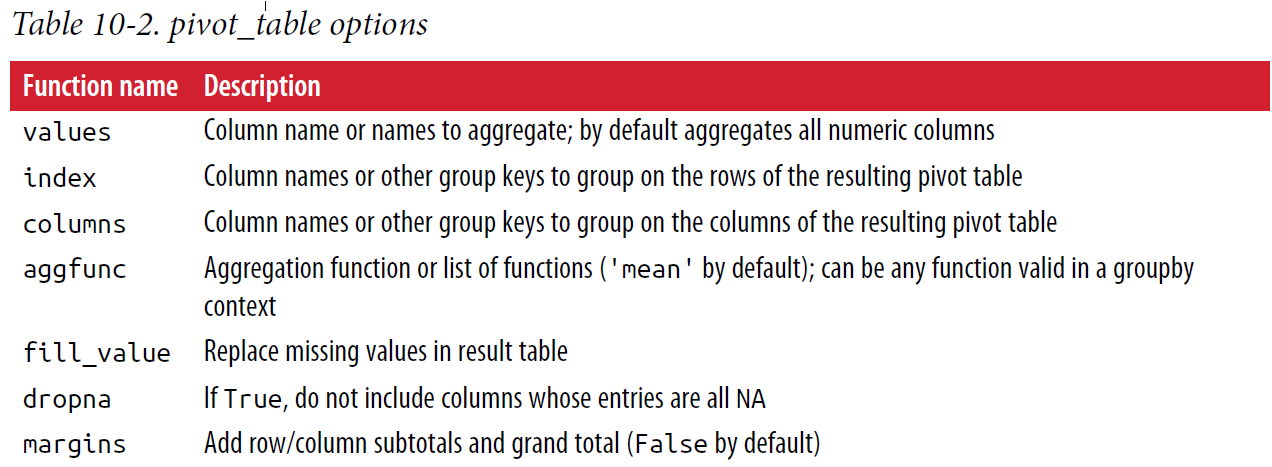

## Cross-Tabulations: Crosstab

In [32]:
data = pd.DataFrame({'Sample' : list(range(1,11)),
                    'Nationality' : ['USA', 'Japan', 'USA'] + ['Japan']*3 
                                 + ['USA']*2 + ['Japan', 'USA'],
                    'Handedness' : ['Right-handed'] + 
                                 (['Left-handed'] + ['Right-handed']*2)*3 })
data

Sample Nationality    Handedness
0       1         USA  Right-handed
1       2       Japan   Left-handed
2       3         USA  Right-handed
3       4       Japan  Right-handed
4       5       Japan   Left-handed
5       6       Japan  Right-handed
6       7         USA  Right-handed
7       8         USA   Left-handed
8       9       Japan  Right-handed
9      10         USA  Right-handed

In [43]:
data.pivot_table(index=['Nationality'], columns=['Handedness'],aggfunc=len,
                margins=True)

Sample                 
Handedness  Left-handed Right-handed All
Nationality                             
Japan                 2            3   5
USA                   1            4   5
All                   3            7  10

we might want to summarize this data by nationality and handedness. You could use pivot_table (as shown above) to do this but the pandas.crosstab function can be more convenient:

In [45]:
pd.crosstab(data.Nationality, data.Handedness, margins=True)

Handedness   Left-handed  Right-handed  All
Nationality                                
Japan                  2             3    5
USA                    1             4    5
All                    3             7   10

The first two arguments to crosstab can each either be an array or Series or a list of arrays. As in the tips data:

In [46]:
pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

#### *Note - Most of the contents like images, examples, statements, etc in my notebooks / notes belongs to author "Wes McKinney" of book "Python for Data Analysis". I have collected / integrated them for study purpose and I don't own it.*